# Autoencoders to reduce dimensionality

* Creating autoencoders using artificial neural networks inorder to reduce dimensionality. TensorFlow is chosen as the framework to implement ANN. The aim is to create an autoencoder with a marginal reconstruction loss.


* Single layer Autoencoders with linear activation function produces the same result as PCA. So, in this notebook we have compared standard PCA and single layer autoencoder. Different activation functions are also explored along with denoising autoencoders.


* Stacked autoencoders yields a better re-construction loss, so we have explored that also in here.

In [1]:
#Importing required packages
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

ImportError: No module named tensorflow

### Dataset:

* Was asked to use numer.ai's training dataset. Link for the dataset -> https://numer.ai/
* This dataset contains 50 features, we're going to reduce it to 5

In [3]:
#train_data = pd.read_csv("/Users/ilabuser/Desktop/Praveen/numerai_datasets/numerai_training_data.csv")
train_data = pd.read_csv("/home/praveen/Documents/Data/numerai_datasets/numerai_training_data.csv")

In [4]:
train_data = train_data.drop(['target'], 1)

In [5]:
col_max = train_data.apply(max, axis=0)
col_min = train_data.apply(min, axis=0)

In [6]:
print zip(col_min,col_max)

[(0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0018737743108521397, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0, 0.98807223888845908), (0.0, 1.0), (0.0, 1.0), (0.019593786382100901, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0, 0.98057549554700207), (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0, 1.0)]


* All the features are in the range [0,1], decided not to normalize the features

In [7]:
corr = train_data.corr()

In [8]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

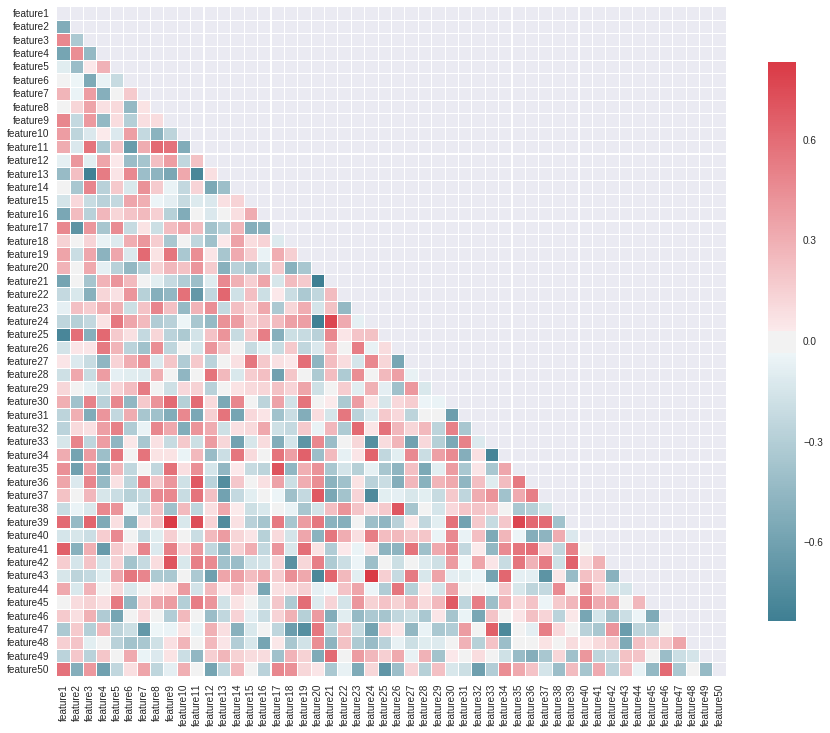

In [9]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.set(style="white")
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            square=True, 
            linewidths=0.1, 
            cbar_kws={"shrink": .5}, ax=ax)

# Standard PCA

Source repo: https://github.com/scikit-learn/scikit-learn/blob/master/sklearn/decomposition/pca.py


In [10]:
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

In [11]:
pca = PCA(n_components=5)
pca_encomp = pca.fit_transform(train_data)
pca_decomp = pca.inverse_transform(pca_encomp)
pca_recon_loss = mean_squared_error(train_data, pca_decomp)
print "PCA Reconstruction loss: ", "{:.9f}".format(pca_recon_loss)

PCA Reconstruction loss:  0.004497210


In [12]:
pd.DataFrame(pca_decomp[0:4])

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.586005,0.435631,0.511016,0.399799,0.459914,0.475188,0.503664,0.495865,0.561878,0.480696,...,0.543759,0.601106,0.446863,0.498190,0.488305,0.530649,0.553703,0.539937,0.410887,0.573284
1,0.440306,0.542968,0.372754,0.643410,0.474141,0.491945,0.354744,0.497439,0.404815,0.533224,...,0.344347,0.521600,0.408986,0.589401,0.472716,0.460987,0.642147,0.574221,0.514076,0.399094
2,0.638666,0.420601,0.658947,0.613020,0.527510,0.306150,0.361933,0.674438,0.471207,0.581742,...,0.354233,0.491491,0.270957,0.839847,0.551182,0.537445,0.546418,0.617101,0.502632,0.483931
3,0.374834,0.540784,0.392115,0.429894,0.454757,0.737208,0.783925,0.502329,0.240459,0.322022,...,0.427048,0.141709,0.910859,0.402282,0.356275,0.550918,0.194375,0.226089,0.596317,0.658350


In [13]:
train_data[0:4]

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature41,feature42,feature43,feature44,feature45,feature46,feature47,feature48,feature49,feature50
0,0.470196,0.475806,0.481583,0.410236,0.500867,0.230700,0.460264,0.560030,0.434636,0.351876,...,0.427756,0.591913,0.436479,0.392846,0.516947,0.642295,0.519752,0.744773,0.328149,0.639641
1,0.436495,0.419201,0.424566,0.650907,0.553419,0.541948,0.415376,0.502826,0.339644,0.556638,...,0.458551,0.571972,0.470835,0.597054,0.456920,0.352030,0.747596,0.467579,0.471882,0.398939
2,0.627422,0.318149,0.621079,0.686767,0.722561,0.337476,0.351766,0.690210,0.421510,0.589994,...,0.382850,0.443996,0.189651,0.882916,0.487749,0.569775,0.567910,0.509521,0.348602,0.504336
3,0.296415,0.549922,0.407248,0.469737,0.506438,0.669061,0.778869,0.550720,0.127187,0.308090,...,0.412008,0.103052,0.911673,0.381023,0.410954,0.594951,0.246629,0.232363,0.456588,0.678506


# Single Layer Autoencoder

<img src="Graphs/single-layer-autoencoder.png">

In [24]:
# Parameters
learning_rate = 0.01
training_epochs = 2000
display_step = 10

In [14]:
# Network Parameters
n_hidden_1 = 5 # 1st layer num features
n_input = 50    # input num features

In [15]:
# tf Graph input
X = tf.placeholder("float64", [None, n_input], name="X")

In [25]:
#Tied Weights for the network
weights = {
'encoder_h1': tf.Variable(np.random.normal(scale=0.1,size=(n_input,n_hidden_1)), name="w_e_h1")}
weights['decoder_h1'] = tf.transpose((weights['encoder_h1']), name="w_d_h1")

biases = {
'encoder_b1': tf.cast(tf.Variable(tf.ones([n_hidden_1]),  name="b_e_h1"), 'float64'),
'decoder_b1': tf.cast(tf.Variable(tf.ones([n_input]),  name="b_d_h1"), 'float64')
}

In [26]:
#Add histogram summaries for weights
tf.summary.histogram("w_e_h1_summ", weights['encoder_h1'])
tf.summary.histogram("w_d_h1_summ", weights['decoder_h1'])

<tf.Tensor 'w_d_h1_summ_1:0' shape=() dtype=string>

In [27]:
#Funciton to chose the activation function
def activate(linear, act_fun):
        if act_fun == 'sigmoid':
            return tf.nn.sigmoid(linear)
        elif act_fun == 'softmax':
            return tf.nn.softmax(linear)
        elif act_fun == 'tanh':
            return tf.nn.tanh(linear)
        elif act_fun == 'relu':
            return tf.nn.relu(linear)
        elif act_fun == 'linear':
            return linear

In [28]:
# Building the encoder with the chosen activation function
def encoder(x, act_fun):
# Encoder Hidden layer with sigmoid activation #1
    with tf.name_scope("en_layer1"):
        layer_1 = activate(tf.add(tf.matmul(x, weights['encoder_h1']),
                                                    biases['encoder_b1']), act_fun)
    return layer_1

# Building the decoder with sigmoid activation function
def decoder(x, act_fun):
# Encoder Hidden layer with sigmoid activation #1
    with tf.name_scope("de_layer1"):
        layer_1 = activate(tf.add(tf.matmul(x, weights['decoder_h1']),
                                                    biases['decoder_b1']), act_fun)
    return layer_1

In [29]:
#Constructs and trains the graph with the activation function that is passed
def construct_train(act_fun):
    # Construct model
    encoder_op = encoder(X, act_fun)
    decoder_op = decoder(encoder_op, act_fun)
    
    # Prediction
    y_pred = decoder_op
    # Targets (Labels) are the input data.
    y_true = X
    
    # Define loss and optimizer, minimize the squared error
    with tf.name_scope("cost"+act_fun):
        cost = tf.reduce_mean(tf.pow(y_true - y_pred, 2))
        train_op = tf.train.AdamOptimizer(learning_rate).minimize(cost)
        # Add scalar summary for cost tensor
        tf.summary.scalar("cost"+act_fun, cost)
    
    # Initializing the variables
    init = tf.global_variables_initializer()
    
    with tf.Session() as sess:
        writer = tf.summary.FileWriter("./logs/autoencoder_logs/AE", sess.graph)
        merged = tf.summary.merge_all()

        sess.run(init)

        # Training cycle
        for epoch in xrange(training_epochs):
            _, c, summary = sess.run([train_op, cost, merged], feed_dict={X: train_data})
            
            writer.add_summary(summary, epoch)
            # Display logs per epoch step
            if epoch % display_step == 0 or epoch+1 == training_epochs:
                print("Epoch:", '%04d' % (epoch+1), 
                      ("cost_"+act_fun+"="+"{:.9f}".format(c)))

        recon_ip, reduced_ip = sess.run([decoder_op, encoder_op], feed_dict={X: train_data})

In [21]:
#Construct the graph and Train using sigmoid activation function
construct_train('linear')

('Epoch:', '0001', 'cost_linear=0.360103266')
('Epoch:', '0011', 'cost_linear=0.162263981')
('Epoch:', '0021', 'cost_linear=0.085717749')
('Epoch:', '0031', 'cost_linear=0.045251768')
('Epoch:', '0041', 'cost_linear=0.025548324')
('Epoch:', '0051', 'cost_linear=0.017971499')
('Epoch:', '0061', 'cost_linear=0.015701311')
('Epoch:', '0071', 'cost_linear=0.014867763')
('Epoch:', '0081', 'cost_linear=0.014029660')
('Epoch:', '0091', 'cost_linear=0.013019527')
('Epoch:', '0101', 'cost_linear=0.012027799')
('Epoch:', '0111', 'cost_linear=0.011143298')
('Epoch:', '0121', 'cost_linear=0.010380558')
('Epoch:', '0131', 'cost_linear=0.009755674')
('Epoch:', '0141', 'cost_linear=0.009262474')
('Epoch:', '0151', 'cost_linear=0.008867773')
('Epoch:', '0161', 'cost_linear=0.008537473')
('Epoch:', '0171', 'cost_linear=0.008248497')
('Epoch:', '0181', 'cost_linear=0.007989928')
('Epoch:', '0191', 'cost_linear=0.007759200')
('Epoch:', '0201', 'cost_linear=0.007555858')
('Epoch:', '0211', 'cost_linear=0.

<img src="Graphs/costlinear.png">

In [25]:
#Construct the graph and Train using sigmoid activation function
construct_train('sigmoid')

('Epoch:', '0001', 'cost_sigmoid=0.073806927')
('Epoch:', '0011', 'cost_sigmoid=0.053464350')
('Epoch:', '0021', 'cost_sigmoid=0.045396252')
('Epoch:', '0031', 'cost_sigmoid=0.037500196')
('Epoch:', '0041', 'cost_sigmoid=0.031468170')
('Epoch:', '0051', 'cost_sigmoid=0.026758074')
('Epoch:', '0061', 'cost_sigmoid=0.023260612')
('Epoch:', '0071', 'cost_sigmoid=0.020645365')
('Epoch:', '0081', 'cost_sigmoid=0.018578559')
('Epoch:', '0091', 'cost_sigmoid=0.016748406')
('Epoch:', '0101', 'cost_sigmoid=0.015012644')
('Epoch:', '0111', 'cost_sigmoid=0.013501777')
('Epoch:', '0121', 'cost_sigmoid=0.012454018')
('Epoch:', '0131', 'cost_sigmoid=0.011879600')
('Epoch:', '0141', 'cost_sigmoid=0.011546078')
('Epoch:', '0151', 'cost_sigmoid=0.011234892')
('Epoch:', '0161', 'cost_sigmoid=0.010858222')
('Epoch:', '0171', 'cost_sigmoid=0.010407612')
('Epoch:', '0181', 'cost_sigmoid=0.009903238')
('Epoch:', '0191', 'cost_sigmoid=0.009382776')
('Epoch:', '0201', 'cost_sigmoid=0.008892531')
('Epoch:', '0

In [26]:
#Construct the graph and Train using softmax activation function
construct_train('softmax')

('Epoch:', '0001', 'cost_softmax=0.249698772')
('Epoch:', '0011', 'cost_softmax=0.249540233')
('Epoch:', '0021', 'cost_softmax=0.249293563')
('Epoch:', '0031', 'cost_softmax=0.249000686')
('Epoch:', '0041', 'cost_softmax=0.248702618')
('Epoch:', '0051', 'cost_softmax=0.248420618')
('Epoch:', '0061', 'cost_softmax=0.248167047')
('Epoch:', '0071', 'cost_softmax=0.247948992')
('Epoch:', '0081', 'cost_softmax=0.247767046')
('Epoch:', '0091', 'cost_softmax=0.247614447')
('Epoch:', '0101', 'cost_softmax=0.247483671')
('Epoch:', '0111', 'cost_softmax=0.247370158')
('Epoch:', '0121', 'cost_softmax=0.247271758')
('Epoch:', '0131', 'cost_softmax=0.247186442')
('Epoch:', '0141', 'cost_softmax=0.247111085')
('Epoch:', '0151', 'cost_softmax=0.247043262')
('Epoch:', '0161', 'cost_softmax=0.246982473')
('Epoch:', '0171', 'cost_softmax=0.246929805')
('Epoch:', '0181', 'cost_softmax=0.246885623')
('Epoch:', '0191', 'cost_softmax=0.246848401')
('Epoch:', '0201', 'cost_softmax=0.246817003')
('Epoch:', '0

In [27]:
#Construct the graph and Train using relu activation function
construct_train('relu')

('Epoch:', '0001', 'cost_relu=0.360103266')
('Epoch:', '0011', 'cost_relu=0.159458011')
('Epoch:', '0021', 'cost_relu=0.094941966')
('Epoch:', '0031', 'cost_relu=0.049918285')
('Epoch:', '0041', 'cost_relu=0.028218914')
('Epoch:', '0051', 'cost_relu=0.018665057')
('Epoch:', '0061', 'cost_relu=0.015480185')
('Epoch:', '0071', 'cost_relu=0.014326493')
('Epoch:', '0081', 'cost_relu=0.013401565')
('Epoch:', '0091', 'cost_relu=0.012444613')
('Epoch:', '0101', 'cost_relu=0.011562011')
('Epoch:', '0111', 'cost_relu=0.010799687')
('Epoch:', '0121', 'cost_relu=0.010164284')
('Epoch:', '0131', 'cost_relu=0.009643301')
('Epoch:', '0141', 'cost_relu=0.009212595')
('Epoch:', '0151', 'cost_relu=0.008854196')
('Epoch:', '0161', 'cost_relu=0.008556620')
('Epoch:', '0171', 'cost_relu=0.008309939')
('Epoch:', '0181', 'cost_relu=0.008105094')
('Epoch:', '0191', 'cost_relu=0.007934495')
('Epoch:', '0201', 'cost_relu=0.007791951')
('Epoch:', '0211', 'cost_relu=0.007672708')
('Epoch:', '0221', 'cost_relu=0.

In [28]:
#Construct the graph and Train using tanh activation function
construct_train('tanh')

('Epoch:', '0001', 'cost_tanh=0.091217864')
('Epoch:', '0011', 'cost_tanh=0.055265432')
('Epoch:', '0021', 'cost_tanh=0.034801908')
('Epoch:', '0031', 'cost_tanh=0.020969553')
('Epoch:', '0041', 'cost_tanh=0.013936051')
('Epoch:', '0051', 'cost_tanh=0.011370064')
('Epoch:', '0061', 'cost_tanh=0.009619062')
('Epoch:', '0071', 'cost_tanh=0.008224676')
('Epoch:', '0081', 'cost_tanh=0.007462135')
('Epoch:', '0091', 'cost_tanh=0.006955846')
('Epoch:', '0101', 'cost_tanh=0.006609236')
('Epoch:', '0111', 'cost_tanh=0.006380664')
('Epoch:', '0121', 'cost_tanh=0.006215966')
('Epoch:', '0131', 'cost_tanh=0.006073429')
('Epoch:', '0141', 'cost_tanh=0.005939560')
('Epoch:', '0151', 'cost_tanh=0.005813507')
('Epoch:', '0161', 'cost_tanh=0.005700433')
('Epoch:', '0171', 'cost_tanh=0.005606066')
('Epoch:', '0181', 'cost_tanh=0.005531206')
('Epoch:', '0191', 'cost_tanh=0.005471148')
('Epoch:', '0201', 'cost_tanh=0.005420114')
('Epoch:', '0211', 'cost_tanh=0.005374810')
('Epoch:', '0221', 'cost_tanh=0.

# Denoising autoencoders

* Additive isotropic Gaussian noise (GS): x̃|x ∼ N (x, σ 2 I)

* Masking noise (MN): a fraction ν of the elements of x (chosen at random for each example)
is forced to 0

* Salt-and-pepper noise (SP): a fraction ν of the elements of x (chosen at random for each
example) is set to their minimum or maximum possible value (typically 0 or 1) according to
a fair coin flip.

### References:

* Stacked Denoising Autoencoders: Learning Useful Representations in a Deep Network with a Local Denoising Criterion - V INCENT , L AROCHELLE , L AJOIE , B ENGIO AND M ANZAGOL

In [30]:
def add_noise(noise_meth, x):
    if noise_meth == 'gaussian':
        n = np.random.normal(0, 0.1, x.shape)
        return x + n
    
    #mask-<percentage-of-maksing> is the syntax. Ex: mask-0.20(masks 20% of the input features)
    if 'mask' in noise_meth:
        frac = float(noise_meth.split('-')[1])
        temp = np.copy(x)
        for i in temp:            
            n = np.random.choice(len(i), round(frac * len(i)), replace=False)
            i[n] = 0
        return temp
    
    #sp-<percentage-of-maksing> is the syntax. Ex: sp-0.20(masks 20% of the input features)
    if 'sp' in noise_meth:
        frac = float(noise_meth.split('-')[1])
        temp = np.copy(x)
        for i in temp:
            n = np.random.choice(len(i), round(frac * len(i)), replace=False)
            i[n] = max(i) if np.random.binomial(1, 0.5) else min(i)
        return temp

In [42]:
# Parameters
learning_rate = 0.01
training_epochs = 2000
display_step = 10

In [33]:
# Network Parameters
n_hidden_1 = 5 # 1st layer num features
n_input = 50    # input num features

In [34]:
#Result the default graph
tf.reset_default_graph()

In [35]:
# tf Graph input
X = tf.placeholder("float64", [None, n_input], name="X")
# Targets (Labels) are the input data.
Y = tf.placeholder("float64", [None, n_input], name="Y")

In [36]:
#Tied Weights for the network
weights = {
'encoder_h1': tf.Variable(np.random.normal(scale=0.1,size=(n_input,n_hidden_1)), name="w_e_h1")}
weights['decoder_h1'] = tf.transpose((weights['encoder_h1']), name="w_d_h1")

biases = {
'encoder_b1': tf.cast(tf.Variable(tf.ones([n_hidden_1]),  name="b_e_h1"), 'float64'),
'decoder_b1': tf.cast(tf.Variable(tf.ones([n_input]),  name="b_d_h1"), 'float64')
}

In [37]:
#Add histogram summaries for weights
tf.summary.histogram("w_e_h1_summ", weights['encoder_h1'])
tf.summary.histogram("w_d_h1_summ", weights['decoder_h1'])

<tf.Tensor 'w_d_h1_summ:0' shape=() dtype=string>

In [38]:
#Constructs and trains the graph with the activation function that is passed
def construct_train_with_noise(noise_meth, act_fun):
    # Construct model
    encoder_op = encoder(X, act_fun)
    decoder_op = decoder(encoder_op, act_fun)
    
    # Prediction
    y_pred = decoder_op
    # Targets (Labels) are the input data.
    y_true = X
    
    # Define loss and optimizer, minimize the squared error
    with tf.name_scope("cost_noisy"):
        cost_noisy = tf.reduce_mean(tf.pow(Y - y_pred, 2))
        train_op = tf.train.AdamOptimizer(learning_rate).minimize(cost_noisy)
        # Add scalar summary for cost tensor
        tf.summary.scalar("cost_noisy", cost_noisy)
    
    # Initializing the variables
    init = tf.global_variables_initializer()
    
    #Create noisy data
    train_data_noisy = add_noise(noise_meth, train_data)
    
    with tf.Session() as sess:
        writer = tf.summary.FileWriter("./logs/autoencoder_logs/DNAE", sess.graph)
        merged = tf.summary.merge_all()

        sess.run(init)

        # Training cycle
        for epoch in xrange(training_epochs):
            _, c, summary = sess.run([train_op, cost_noisy, merged], feed_dict={X: train_data_noisy, Y: train_data})
            
            writer.add_summary(summary, epoch)
            # Display logs per epoch step
            if epoch % display_step == 0 or epoch+1 == training_epochs:
                print("Epoch:", '%04d' % (epoch+1), 
                      ("cost_"+noise_meth+"_"+act_fun+"="+"{:.9f}".format(c)))

        recon_ip, reduced_ip = sess.run([decoder_op, encoder_op], feed_dict={X: train_data})

In [43]:
construct_train_with_noise('gaussian', 'linear')

('Epoch:', '0001', 'cost_gaussian_linear=0.350163339')
('Epoch:', '0011', 'cost_gaussian_linear=0.159900386')
('Epoch:', '0021', 'cost_gaussian_linear=0.086797677')
('Epoch:', '0031', 'cost_gaussian_linear=0.045260146')
('Epoch:', '0041', 'cost_gaussian_linear=0.026060436')
('Epoch:', '0051', 'cost_gaussian_linear=0.018184428')
('Epoch:', '0061', 'cost_gaussian_linear=0.016002085')
('Epoch:', '0071', 'cost_gaussian_linear=0.015598140')
('Epoch:', '0081', 'cost_gaussian_linear=0.015287363')
('Epoch:', '0091', 'cost_gaussian_linear=0.014803438')
('Epoch:', '0101', 'cost_gaussian_linear=0.014227778')
('Epoch:', '0111', 'cost_gaussian_linear=0.013604270')
('Epoch:', '0121', 'cost_gaussian_linear=0.012931743')
('Epoch:', '0131', 'cost_gaussian_linear=0.012214671')
('Epoch:', '0141', 'cost_gaussian_linear=0.011482255')
('Epoch:', '0151', 'cost_gaussian_linear=0.010777430')
('Epoch:', '0161', 'cost_gaussian_linear=0.010135584')
('Epoch:', '0171', 'cost_gaussian_linear=0.009567855')
('Epoch:',

In [44]:
construct_train_with_noise('gaussian', 'sigmoid')

('Epoch:', '0001', 'cost_gaussian_sigmoid=0.076233587')
('Epoch:', '0011', 'cost_gaussian_sigmoid=0.055310034')
('Epoch:', '0021', 'cost_gaussian_sigmoid=0.047015361')
('Epoch:', '0031', 'cost_gaussian_sigmoid=0.038661587')
('Epoch:', '0041', 'cost_gaussian_sigmoid=0.032331733')
('Epoch:', '0051', 'cost_gaussian_sigmoid=0.027285056')
('Epoch:', '0061', 'cost_gaussian_sigmoid=0.023564650')
('Epoch:', '0071', 'cost_gaussian_sigmoid=0.020899327')
('Epoch:', '0081', 'cost_gaussian_sigmoid=0.019033314')
('Epoch:', '0091', 'cost_gaussian_sigmoid=0.017720565')
('Epoch:', '0101', 'cost_gaussian_sigmoid=0.016726697')
('Epoch:', '0111', 'cost_gaussian_sigmoid=0.015871782')
('Epoch:', '0121', 'cost_gaussian_sigmoid=0.015063229')
('Epoch:', '0131', 'cost_gaussian_sigmoid=0.014295511')
('Epoch:', '0141', 'cost_gaussian_sigmoid=0.013593078')
('Epoch:', '0151', 'cost_gaussian_sigmoid=0.012935936')
('Epoch:', '0161', 'cost_gaussian_sigmoid=0.012254013')
('Epoch:', '0171', 'cost_gaussian_sigmoid=0.0114

In [45]:
construct_train_with_noise('mask-0.10', 'linear')

/home/praveen/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


('Epoch:', '0001', 'cost_mask-0.10_linear=0.348412253')
('Epoch:', '0011', 'cost_mask-0.10_linear=0.156811878')
('Epoch:', '0021', 'cost_mask-0.10_linear=0.083289460')
('Epoch:', '0031', 'cost_mask-0.10_linear=0.043467563')
('Epoch:', '0041', 'cost_mask-0.10_linear=0.025149074')
('Epoch:', '0051', 'cost_mask-0.10_linear=0.018000952')
('Epoch:', '0061', 'cost_mask-0.10_linear=0.016319432')
('Epoch:', '0071', 'cost_mask-0.10_linear=0.016043652')
('Epoch:', '0081', 'cost_mask-0.10_linear=0.015727721')
('Epoch:', '0091', 'cost_mask-0.10_linear=0.015255556')
('Epoch:', '0101', 'cost_mask-0.10_linear=0.014722149')
('Epoch:', '0111', 'cost_mask-0.10_linear=0.014159829')
('Epoch:', '0121', 'cost_mask-0.10_linear=0.013556501')
('Epoch:', '0131', 'cost_mask-0.10_linear=0.012916631')
('Epoch:', '0141', 'cost_mask-0.10_linear=0.012260258')
('Epoch:', '0151', 'cost_mask-0.10_linear=0.011611548')
('Epoch:', '0161', 'cost_mask-0.10_linear=0.011000352')
('Epoch:', '0171', 'cost_mask-0.10_linear=0.0104

In [46]:
construct_train_with_noise('mask-0.10', 'sigmoid')

/home/praveen/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


('Epoch:', '0001', 'cost_mask-0.10_sigmoid=0.076223355')
('Epoch:', '0011', 'cost_mask-0.10_sigmoid=0.054062995')
('Epoch:', '0021', 'cost_mask-0.10_sigmoid=0.046071013')
('Epoch:', '0031', 'cost_mask-0.10_sigmoid=0.037681305')
('Epoch:', '0041', 'cost_mask-0.10_sigmoid=0.031506482')
('Epoch:', '0051', 'cost_mask-0.10_sigmoid=0.026593274')
('Epoch:', '0061', 'cost_mask-0.10_sigmoid=0.023045917')
('Epoch:', '0071', 'cost_mask-0.10_sigmoid=0.020562246')
('Epoch:', '0081', 'cost_mask-0.10_sigmoid=0.018885087')
('Epoch:', '0091', 'cost_mask-0.10_sigmoid=0.017767974')
('Epoch:', '0101', 'cost_mask-0.10_sigmoid=0.016982028')
('Epoch:', '0111', 'cost_mask-0.10_sigmoid=0.016343611')
('Epoch:', '0121', 'cost_mask-0.10_sigmoid=0.015734211')
('Epoch:', '0131', 'cost_mask-0.10_sigmoid=0.015108459')
('Epoch:', '0141', 'cost_mask-0.10_sigmoid=0.014480896')
('Epoch:', '0151', 'cost_mask-0.10_sigmoid=0.013880548')
('Epoch:', '0161', 'cost_mask-0.10_sigmoid=0.013301512')
('Epoch:', '0171', 'cost_mask-0

In [47]:
construct_train_with_noise('sp-0.10', 'linear')

/home/praveen/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


('Epoch:', '0001', 'cost_sp-0.10_linear=0.350147179')
('Epoch:', '0011', 'cost_sp-0.10_linear=0.159942618')
('Epoch:', '0021', 'cost_sp-0.10_linear=0.086898279')
('Epoch:', '0031', 'cost_sp-0.10_linear=0.045343167')
('Epoch:', '0041', 'cost_sp-0.10_linear=0.026150501')
('Epoch:', '0051', 'cost_sp-0.10_linear=0.018299195')
('Epoch:', '0061', 'cost_sp-0.10_linear=0.016143117')
('Epoch:', '0071', 'cost_sp-0.10_linear=0.015775668')
('Epoch:', '0081', 'cost_sp-0.10_linear=0.015515358')
('Epoch:', '0091', 'cost_sp-0.10_linear=0.015097301')
('Epoch:', '0101', 'cost_sp-0.10_linear=0.014598167')
('Epoch:', '0111', 'cost_sp-0.10_linear=0.014056673')
('Epoch:', '0121', 'cost_sp-0.10_linear=0.013470166')
('Epoch:', '0131', 'cost_sp-0.10_linear=0.012837891')
('Epoch:', '0141', 'cost_sp-0.10_linear=0.012173936')
('Epoch:', '0151', 'cost_sp-0.10_linear=0.011504728')
('Epoch:', '0161', 'cost_sp-0.10_linear=0.010863833')
('Epoch:', '0171', 'cost_sp-0.10_linear=0.010279627')
('Epoch:', '0181', 'cost_sp-

In [48]:
construct_train_with_noise('sp-0.10', 'sigmoid')

/home/praveen/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


('Epoch:', '0001', 'cost_sp-0.10_sigmoid=0.076240108')
('Epoch:', '0011', 'cost_sp-0.10_sigmoid=0.055319408')
('Epoch:', '0021', 'cost_sp-0.10_sigmoid=0.047049265')
('Epoch:', '0031', 'cost_sp-0.10_sigmoid=0.038702505')
('Epoch:', '0041', 'cost_sp-0.10_sigmoid=0.032384168')
('Epoch:', '0051', 'cost_sp-0.10_sigmoid=0.027346354')
('Epoch:', '0061', 'cost_sp-0.10_sigmoid=0.023641838')
('Epoch:', '0071', 'cost_sp-0.10_sigmoid=0.021006022')
('Epoch:', '0081', 'cost_sp-0.10_sigmoid=0.019190455')
('Epoch:', '0091', 'cost_sp-0.10_sigmoid=0.017957257')
('Epoch:', '0101', 'cost_sp-0.10_sigmoid=0.017075698')
('Epoch:', '0111', 'cost_sp-0.10_sigmoid=0.016355653')
('Epoch:', '0121', 'cost_sp-0.10_sigmoid=0.015670347')
('Epoch:', '0131', 'cost_sp-0.10_sigmoid=0.014971110')
('Epoch:', '0141', 'cost_sp-0.10_sigmoid=0.014276880')
('Epoch:', '0151', 'cost_sp-0.10_sigmoid=0.013623545')
('Epoch:', '0161', 'cost_sp-0.10_sigmoid=0.013003471')
('Epoch:', '0171', 'cost_sp-0.10_sigmoid=0.012360406')
('Epoch:',

# Stacked Auto-encoders
<img src="Graphs/stacked-autoencoders.png">

In [66]:
# Parameters
learning_rate = 0.01
training_epochs = 500
batch_size = 128
display_step = 10

In [49]:
# Network Parameters
n_hidden_1 = 35 # 1st layer num features
n_hidden_2 = 15 # 2nd layer num features
n_hidden_3 = 5  # 3rd layer num features
n_input = 50    # input num features

In [50]:
#Result the default graph
tf.reset_default_graph()

In [51]:
# tf Graph input
X = tf.placeholder("float64", [None, n_input], name="X")

In [52]:
#Tied Weights for the network
weights = {
'encoder_h1': tf.Variable(np.random.normal(scale=0.1,size=(n_input,n_hidden_1)), name="w_e_h1"),
'encoder_h2': tf.Variable(np.random.normal(scale=0.1,size=(n_hidden_1, n_hidden_2)), name="w_e_h2"),
'encoder_h3': tf.Variable(np.random.normal(scale=0.1,size=(n_hidden_2, n_hidden_3)), name="w_e_h3")}

weights['decoder_h1'] = tf.transpose((weights['encoder_h3']), name="w_d_h1")
weights['decoder_h2'] = tf.transpose((weights['encoder_h2']), name="w_d_h2")
weights['decoder_h3'] = tf.transpose((weights['encoder_h1']), name="w_d_h3")

biases = {
'encoder_b1': tf.cast(tf.Variable(tf.ones([n_hidden_1]),  name="b_e_h1"), 'float64'),
'encoder_b2': tf.cast(tf.Variable(tf.ones([n_hidden_2]),  name="b_e_h2"), 'float64'),
'encoder_b3': tf.cast(tf.Variable(tf.ones([n_hidden_3]),  name="b_e_h3"), 'float64'),
'decoder_b1': tf.cast(tf.Variable(tf.ones([n_hidden_2]),  name="b_d_h1"), 'float64'),
'decoder_b2': tf.cast(tf.Variable(tf.ones([n_hidden_1]),  name="b_d_h2"), 'float64'),
'decoder_b3': tf.cast(tf.Variable(tf.ones([n_input]),     name="b_e_h3"), 'float64')
}

In [53]:
#Add histogram summaries for weights
tf.summary.histogram("w_e_h1_summ", weights['encoder_h1'])
tf.summary.histogram("w_e_h2_summ", weights['encoder_h2'])
tf.summary.histogram("w_e_h3_summ", weights['encoder_h3'])
tf.summary.histogram("w_d_h1_summ", weights['decoder_h1'])
tf.summary.histogram("w_d_h2_summ", weights['decoder_h2'])
tf.summary.histogram("w_d_h3_summ", weights['decoder_h3'])

<tf.Tensor 'w_d_h3_summ:0' shape=() dtype=string>

In [54]:
# Building the encoder
def encoder(x):
# Encoder Hidden layer with sigmoid activation #1
    with tf.name_scope("en_layer1"):
        layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['encoder_h1']),
                                                    biases['encoder_b1']))
# Encoder Hidden layer with sigmoid activation #2
    with tf.name_scope("en_layer2"):
        layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['encoder_h2']),
                                                          biases['encoder_b2']))
# Encoder Hidden layer with sigmoid activation #3
    with tf.name_scope("en_layer3"):
        layer_3 = tf.nn.sigmoid(tf.add(tf.matmul(layer_2, weights['encoder_h3']),
                                                          biases['encoder_b3']))
    return layer_3

In [55]:
# Building the decoder
def decoder(x):
# Encoder Hidden layer with sigmoid activation #1
    with tf.name_scope("de_layer1"):
        layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['decoder_h1']),
                                                    biases['decoder_b1']))
# Decoder Hidden layer with sigmoid activation #2
    with tf.name_scope("de_layer2"):
        layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['decoder_h2']),
                                                          biases['decoder_b2']))
# Decoder Hidden layer with sigmoid activation #2
    with tf.name_scope("de_layer3"):
        layer_3 = tf.nn.sigmoid(tf.add(tf.matmul(layer_2, weights['decoder_h3']),
                                                          biases['decoder_b3']))
    return layer_3


In [56]:
# Construct model
encoder_op = encoder(X)
decoder_op = decoder(encoder_op)

In [57]:
# Prediction
y_pred = decoder_op
# Targets (Labels) are the input data.
y_true = X

In [58]:
# Define loss and optimizer, minimize the squared error
with tf.name_scope("cost"):
    cost = tf.reduce_mean(tf.pow(y_true - y_pred, 2))
    train_op = tf.train.AdamOptimizer(learning_rate).minimize(cost)
    # Add scalar summary for cost tensor
    tf.summary.scalar("cost", cost)

In [59]:
# Initializing the variables
init = tf.global_variables_initializer()

In [ ]:
with tf.Session() as sess:
    writer = tf.summary.FileWriter("./logs/autoencoder_logs/SAE", sess.graph)
    merged = tf.summary.merge_all()
    
    sess.run(init)
    total_batch = int(len(train_data)/batch_size)
    
    # Training cycle
    for epoch in xrange(training_epochs):
    # Loop over all batches
        for start, end in zip(range(0, len(train_data), batch_size), range(batch_size, len(train_data)+1, batch_size)):
            batch_xs = train_data[start:end]
            
            _, c, summary = sess.run([train_op, cost, merged], feed_dict={X: batch_xs})
        
        writer.add_summary(summary, epoch)
        
        # Display logs per epoch step
        if epoch % display_step == 0 or epoch+1 == training_epochs:
            print("Epoch:", '%04d' % (epoch+1),  
                  "cost=", "{:.9f}".format(c))
            
    recon_ip, reduced_ip = sess.run([decoder_op, encoder_op], feed_dict={X: train_data})

('Epoch:', '0001', 'cost=', '0.012097177')
('Epoch:', '0011', 'cost=', '0.006421700')
('Epoch:', '0021', 'cost=', '0.004058094')
('Epoch:', '0031', 'cost=', '0.003701714')
('Epoch:', '0041', 'cost=', '0.003582571')
('Epoch:', '0051', 'cost=', '0.003532645')
('Epoch:', '0061', 'cost=', '0.003532747')
('Epoch:', '0071', 'cost=', '0.003546489')
('Epoch:', '0081', 'cost=', '0.003534431')
('Epoch:', '0091', 'cost=', '0.003346001')
('Epoch:', '0101', 'cost=', '0.003597949')
('Epoch:', '0111', 'cost=', '0.003396251')
('Epoch:', '0121', 'cost=', '0.003376581')
('Epoch:', '0131', 'cost=', '0.003286160')
('Epoch:', '0141', 'cost=', '0.003348295')
('Epoch:', '0151', 'cost=', '0.003361019')
('Epoch:', '0161', 'cost=', '0.003343634')
('Epoch:', '0171', 'cost=', '0.003355038')
('Epoch:', '0181', 'cost=', '0.003356624')
('Epoch:', '0191', 'cost=', '0.003271564')
('Epoch:', '0201', 'cost=', '0.003209284')
('Epoch:', '0211', 'cost=', '0.003320103')
('Epoch:', '0221', 'cost=', '0.003231584')
('Epoch:', 

# Loss Summary:

* PCA:  0.004662337


* Single Layer Linear Autoencoder: 0.004662338


* Stacked sigmoid Autoencoder: 0.003094178